# Лабораторна робота № 1

Імпортуємо необхідні бібліотеки:

In [1]:
import numpy as np # імпортуємо бібліотеку numpy для роботи з масивами
import sympy as sp # імпортуємо бібліотеку sympy для роботи з символьними виразами

## I3. Розв'язати систему рівнянь за допомогою методу Жордана-Гаусса:

\begin{equation}
    \begin{cases}
        x_1 + x_2 + 2x_3 = -1, \\
        2x_1 - x_2 + 2x_3 = -4,\\
        4x_1 + x_2 + 4x_3 = -2; 
    \end{cases}
\end{equation}

### Алгоритм методу Жордана-Гаусса:

1. Обираємо опорний елемент на головній діагоналі поточного рядку
    > Якщо він довірнює нулю, то міняємо поточний рядок з іншим, де опорний елемент не дорівнює нулю у тому ж стовпцю
2. Ділимо поточний рядок на опорний елемент
3. Від поточного рядка віднімаємо інші рядки, помножені на коефіцієнти, щоб зробити нулями всі елементи у стовпці опорного елемента
4. Повторюємо кроки 1-3 для кожного рядка, крім останнього
5. Зворотнім ходом знаходимо невідомі

In [2]:
def gauss_jordan_elimination(a):
    a = np.array(a, dtype=np.float64) # перетворюємо вхідний масив в масив numpy 
    rows, _ = a.shape # отримуємо розмірність масиву
    
    for i in range(rows):
        # знаходимо індекс рядка з максимальним елементом
        pivot_row = np.argmax(np.abs(a[i:, i])) + i # знаходимо індекс рядка з максимальним елементом
        if a[pivot_row, i] == 0:
            continue # якщо максимальний елемент рівний нулю, переходимо до наступної ітерації
        # міняємо місцями рядки
        a[[i, pivot_row]] = a[[pivot_row, i]]
        # ділимо рядок на максимальний елемент
        a[i] /= a[i, i]

        for j in range(rows):
            if i != j:
                a[j] -= a[i] * a[j, i]

    return np.round(a[:, -1], decimals=4) 

In [3]:
# fmt:off
A = np.array([
    [1, 1, 2],
    [2, -1, 2],
    [4, 1, 4],
])
B = np.array([-1, -4, -2])
equation = np.column_stack((A, B))
# fmt:on
gauss_jordan_elimination(equation)

array([ 1.,  2., -2.])

Отже, розв'язок системи рівнянь такий:

\begin{equation}
    \begin{cases}
        x_1 = 1, \\
        x_2 = 2,\\
        x_3 = -2; 
    \end{cases}
\end{equation}

## I4. Знайти загальний розв'язок та усі базисні розв'язки системи лінійних рівнянь:

\begin{equation}
    \begin{cases}
        x_1 + x_2 - 2x_3 + x_4 = 1, \\
        x_1 - 3x_2 + x_3 + x_4 = 0,\\
        4x_1 + 3x_2 - 4x_3 - x_4 = 2; 
    \end{cases}
\end{equation}

Доповнена матриця A|b для цієї системи:

```
[ 1  1 -2  1 | 1 ]
[ 1 -3  1  1 | 0 ]
[ 4  3 -4 -1 | 2 ]
```

Розв'яжемо спочатку математично цю систему рівнянь:

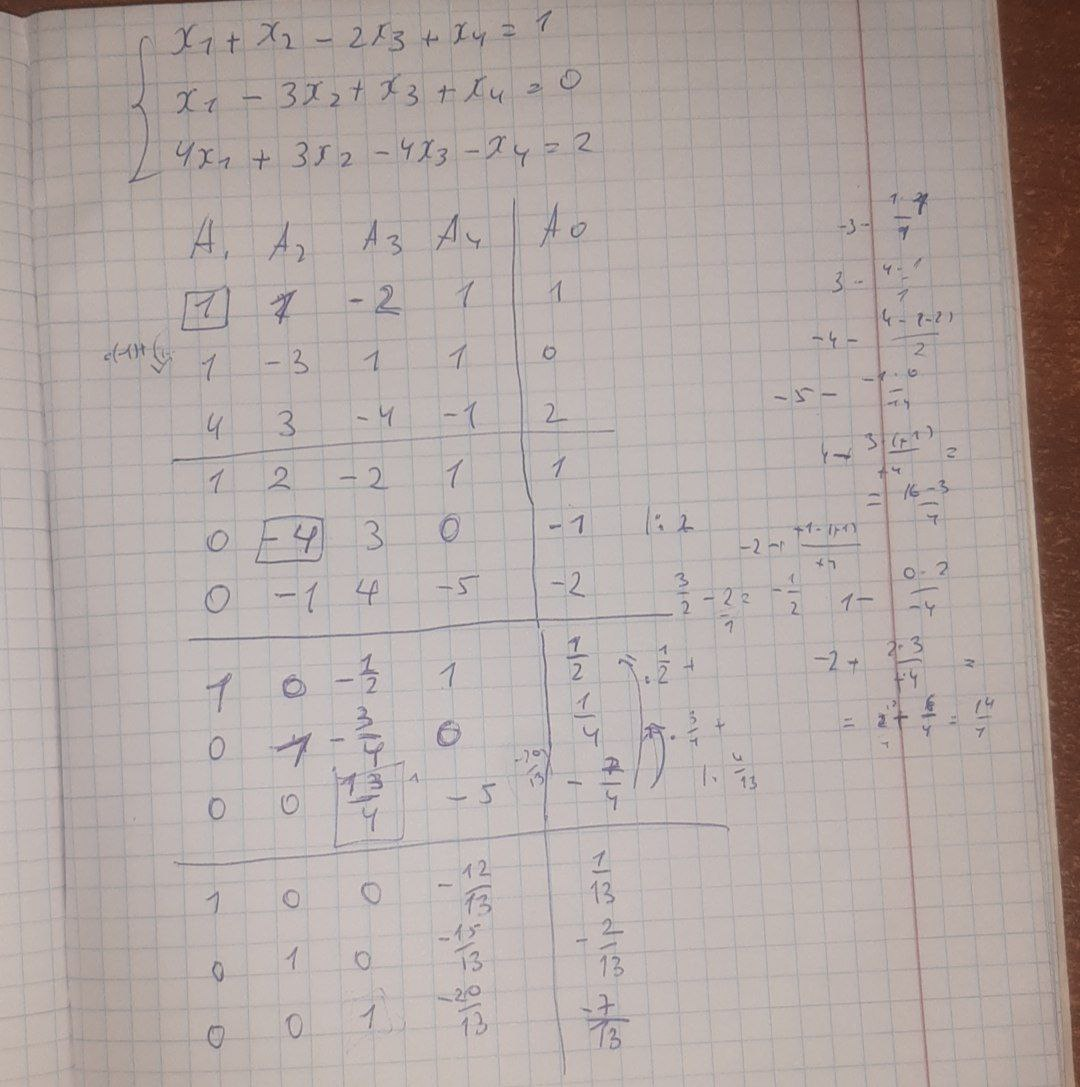
             
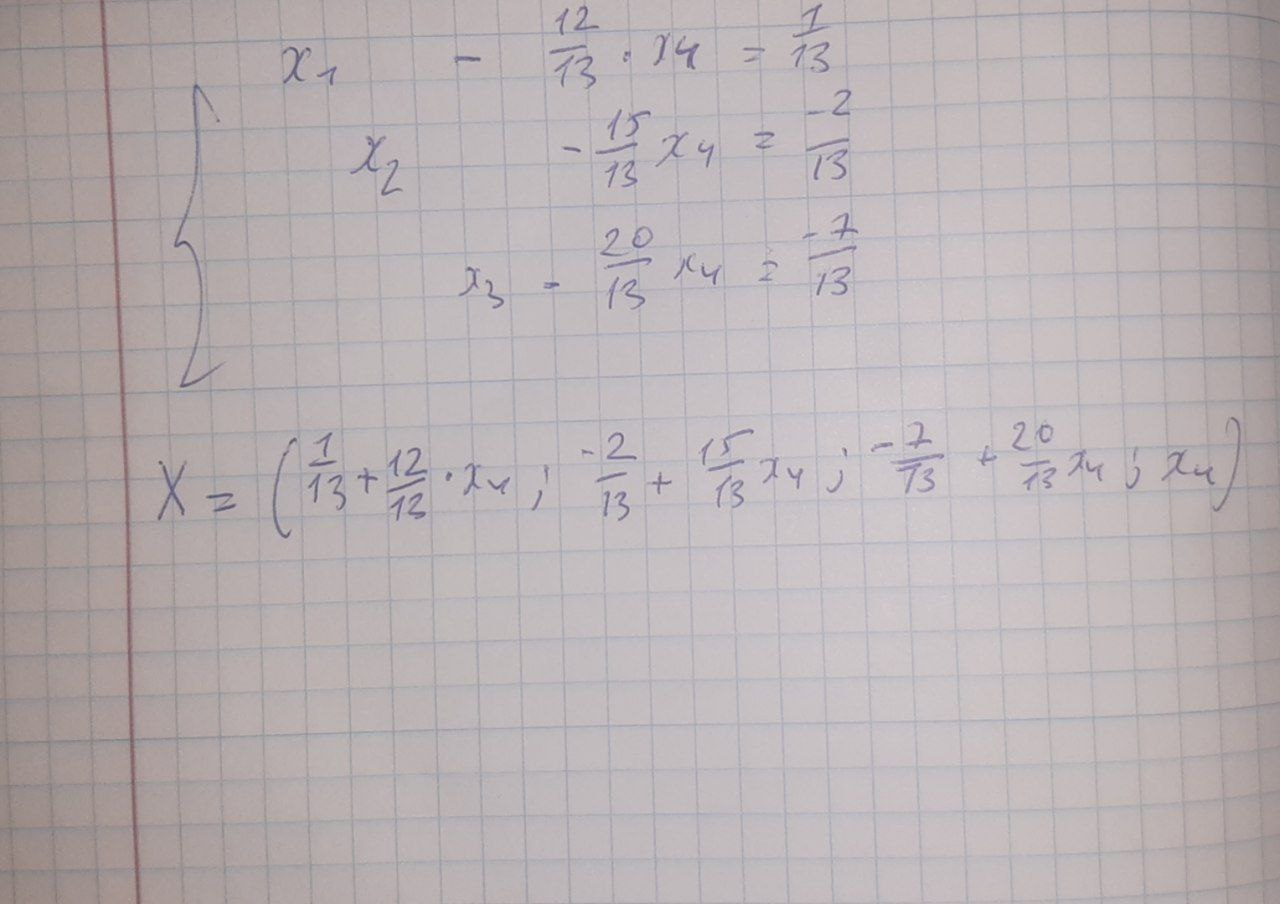

Знайдемо загальний розв'язок за допомогою нашої функції `gauss_jordan_elimination` та знайдемо базисні розв'язки, скориставшись бібліотекою `sympy`:

In [4]:
# fmt:off
A = np.array([
    [1, 1, -2, 1],
    [1, -3, 1, 1],
    [4, 3, -4, -1]
])
B = np.array([1, 0, 2])
# fmt:on
augmented_matrix = np.column_stack((A, B))

# Знаходимо загальний розв'язок системи використовуючи метод Гауса-Жордана
gauss_jordan_elimination(augmented_matrix)

array([ 0.0769, -0.1538, -0.5385])

Де, $\frac{1}{13} \simeq 0.0769, -\frac{2}{13} \simeq -0.1538, -\frac{7}{13} \simeq -0.5385$

In [5]:
x1, x2, x3, x4 = sp.symbols("x1 x2 x3 x4")

eq1 = sp.Eq(x1 + x2 - 2 * x3 + x4, 1)
eq2 = sp.Eq(x1 - 3 * x2 + x3 + x4, 0)
eq3 = sp.Eq(4 * x1 + 3 * x2 - 4 * x3 - x4, 2)

sp.linsolve([eq1, eq2, eq3], x1, x2, x3, x4)

{(12*x4/13 + 1/13, 15*x4/13 - 2/13, 20*x4/13 - 7/13, x4)}

Як бачимо, ми отримали ті ж розв'язки, що й при власноручному розв'язанні системи рівнянь.